<a href="https://colab.research.google.com/github/zhangou888/NN/blob/main/Feedforward_Neural_Network_on_Iris_Dataset_from_UCI_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Example: Feedforward Neural Network on Iris Dataset from UCI/Kaggle
This is an entire Iris neural network code with 80/20 split, full training + evaluation + prediction visualization.

In [2]:
# Load all libraries
## Neural Nets
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

## Data Loading/Cleaning
import pandas as pd
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Splitting
from sklearn.model_selection import train_test_split

# Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Loading data and batching
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt

In [3]:
# Step 2: Load Iris dataset from seaborn (also available on Kaggle)
data = sns.load_dataset('iris')  # shape (150, 5); includes 4 features + 1 species label
print(data.head())  # Display first few rows

# Step 2: Encode string labels into integers and normalize feature values
label_encoder = LabelEncoder()
data['species'] = label_encoder.fit_transform(data['species'])  # e.g., 'setosa' → 0, etc.

X = data.drop('species', axis=1).values  # Extract features (shape: 150 x 4)
y = data['species'].values               # Extract labels (0, 1, or 2)

scaler = StandardScaler()                # Standardize features: zero mean, unit variance
X = scaler.fit_transform(X)              # Apply normalization

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [5]:
# Step 3: Split into train/test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert NumPy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test, dtype=torch.long)

# Create PyTorch datasets and data loaders for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)  # Shuffle during training
test_loader  = DataLoader(test_dataset, batch_size=16)                 # No need to shuffle test set


##  This is a 3-layer fully connected network:

- Input: 4 features

- Hidden layers: 16 → 8

- Output: 3 classes

In [4]:
# Step 4: Define Feedforward Neural Network for classification
class IrisNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(4, 16)  # Input layer (4 features) → Hidden layer with 16 neurons
        self.fc2 = nn.Linear(16, 8)  # Hidden layer → another smaller hidden layer
        self.fc3 = nn.Linear(8, 3)   # Output layer: 3 neurons for 3 iris species

    def forward(self, x):
        x = F.relu(self.fc1(x))     # Apply ReLU activation after first layer
        x = F.relu(self.fc2(x))     # Apply ReLU after second layer
        return self.fc3(x)          # Final output logits (raw scores), no softmax needed


In [6]:
# Step 5: Initialize model, loss function, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available
model = IrisNet().to(device)                    # Move model to selected device
criterion = nn.CrossEntropyLoss()               # Loss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Adam optimizer with learning rate 0.01

In [8]:
# Step 6: Training loop
epochs = 50  # Number of full passes through training data
for epoch in range(epochs):
    model.train()           # Set model to training mode
    total_loss = 0          # Track total loss in this epoch

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)  # Move data to GPU/CPU

        optimizer.zero_grad()         # Clear previous gradients
        outputs = model(X_batch)      # Forward pass: get predictions
        loss = criterion(outputs, y_batch)  # Calculate loss
        loss.backward()              # Backward pass: compute gradients
        optimizer.step()             # Update model weights

        total_loss += loss.item()    # Add current batch loss to total

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}")  # Show progress per epoch


Epoch 1/50, Loss: 0.3391
Epoch 2/50, Loss: 0.3498
Epoch 3/50, Loss: 0.3005
Epoch 4/50, Loss: 0.3658
Epoch 5/50, Loss: 0.4365
Epoch 6/50, Loss: 0.4106
Epoch 7/50, Loss: 0.3807
Epoch 8/50, Loss: 0.3730
Epoch 9/50, Loss: 0.3578
Epoch 10/50, Loss: 0.3644
Epoch 11/50, Loss: 0.3282
Epoch 12/50, Loss: 0.5150
Epoch 13/50, Loss: 0.4269
Epoch 14/50, Loss: 0.5576
Epoch 15/50, Loss: 0.4902
Epoch 16/50, Loss: 0.3132
Epoch 17/50, Loss: 0.3487
Epoch 18/50, Loss: 0.5995
Epoch 19/50, Loss: 0.3242
Epoch 20/50, Loss: 0.4034
Epoch 21/50, Loss: 0.4334
Epoch 22/50, Loss: 0.3175
Epoch 23/50, Loss: 0.3457
Epoch 24/50, Loss: 0.3094
Epoch 25/50, Loss: 0.3134
Epoch 26/50, Loss: 0.3762
Epoch 27/50, Loss: 0.3510
Epoch 28/50, Loss: 0.3258
Epoch 29/50, Loss: 0.4080
Epoch 30/50, Loss: 0.2976
Epoch 31/50, Loss: 0.3730
Epoch 32/50, Loss: 0.3311
Epoch 33/50, Loss: 0.2938
Epoch 34/50, Loss: 0.3961
Epoch 35/50, Loss: 0.4045
Epoch 36/50, Loss: 0.5606
Epoch 37/50, Loss: 0.2900
Epoch 38/50, Loss: 0.3108
Epoch 39/50, Loss: 0.

In [11]:
# Step 7: Evaluate on test set
model.eval()  # Switch to evaluation mode (disable dropout/batchnorm)
correct = 0
total = 0

all_preds = []   # store predicted labels
all_labels = []  # store true labels (this line was missing!)

with torch.no_grad():  # Turn off gradient tracking for evaluation
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)                 # Get predictions
        _, predicted = torch.max(outputs.data, 1)  # Get index of max logit (class prediction)
        total += y_batch.size(0)                   # Count total samples
        correct += (predicted == y_batch).sum().item()  # Count correct predictions

print(f"Test Accuracy: {100 * correct / total:.2f}%")  # Final accuracy on test set

Test Accuracy: 100.00%


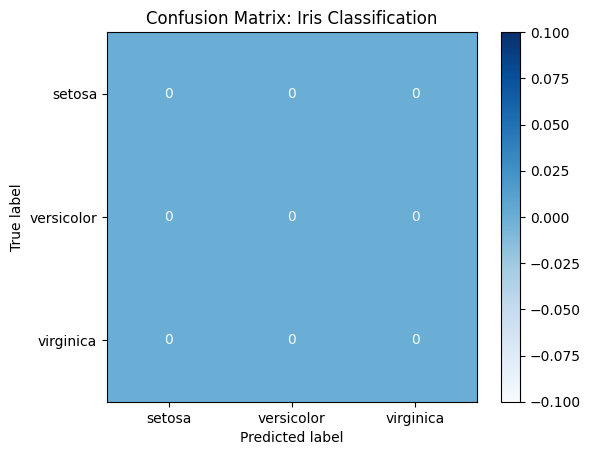

In [13]:
# Step 8: Visualize confusion matrix
cm = confusion_matrix(all_labels, all_preds, labels=[0, 1, 2])
labels = label_encoder.classes_
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Iris Classification")
plt.show()
